In [1]:
import numpy  as np
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite as bi
import matplotlib.pyplot as plt
from datetime import datetime
from imp import reload 
import os
from tqdm import tqdm
from scipy import stats as st


import  weighted_network as wn
import dataset_construction as dc

import seaborn as sns
import bipcm

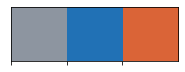

In [2]:
colours=['#8D95A0','#2171b5','#DA6437']
own=sns.color_palette(colours)

sns.palplot(own)
sns.set_palette(own)

# This notebook provides the codes for the figures and tables in the appendix

## Table A.1: Number of treaties with different number of subjects

## Figure G.1(a): the bi-adjacency matrix of the bipartite country-treaty network for air and atmosphere in 2015

In [ ]:
df_parties_total=pd.read_csv('IEA_data/parties.csv')

list_TypeofDates=['date_entry_into_force','date_ratification','date_simple_sigNMture','date_definite_sigNMture','date_withdrawal','date_consent_to_be_bound','date_accession_approv','date_acceptance_approv','date_provisioNMl_application','date_succession','date_reservation']
for i in list_TypeofDates:
    df_parties_total[i]=pd.to_datetime(df_parties_total[i],format='%d/%m/%Y')
df_parties_1=df_parties_total[(df_parties_total['date_entry_into_force']<datetime(1947,12,31))|(df_parties_total['date_ratification']<datetime(1947,12,31))]

old_treaties=set(df_parties_1['treaty_id'])
for i in old_treaties:
    df_parties_total=df_parties_total[df_parties_total['treaty_id']!=i]


df_parties=wn.data_selection(df_parties_total,2015, None, [2])
B=wn.bipartite_network(df_parties)

nodes_treaties= {n for n,d in B.nodes(data=True) if d['bipartite']==0}
nodes_parties= set(B) - nodes_treaties
country_degrees,treaty_degrees=bi.degrees(B,nodes_treaties)

country_sorted={k: v for k, v in sorted(dict(country_degrees).items(), key=lambda item: item[1], reverse=True)}
treaty_sorted={k: v for k, v in sorted(dict(treaty_degrees).items(), key=lambda item: item[1], reverse=True)}

bi_matrix=bi.biadjacency_matrix(B,row_order=list(country_sorted.keys()),column_order=list(treaty_sorted.keys()),weight=None)
a_matrix=bi_matrix.A 



In [ ]:
figsize = 12,9
figure, ax = plt.subplots(figsize=figsize)
  

g=sns.heatmap(a_matrix,cmap=['white',colours[1]],cbar=False,linewidths=.01, xticklabels=5, yticklabels=20, alpha = 1)
sns.despine(top=False, right=False, left=False, bottom=False, 
        offset=None, trim=False) # Remove the bottom and right spines from plot(s).

plt.tick_params(labelsize=28)
labels = g.get_xticklabels() + g.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]

font2 = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size'   : 36,
    }

plt.xlabel('Treaty',font2)
plt.ylabel('Country',font2)
plt.savefig('results/country_treaty_matrix_air_2015.pdf')